ikea_items.csv was downloaded
All prices are valid
|    |   item_id | name     | category      |   price |   old_price | sellable_online   | link                                                                       | other_colors   | short_description                        | designer             |   depth |   height |   width | has_other_colors   | has_old_price   |
|---:|----------:|:---------|:--------------|--------:|------------:|:------------------|:---------------------------------------------------------------------------|:---------------|:-----------------------------------------|:---------------------|--------:|---------:|--------:|:-------------------|:----------------|
|  0 |  90420332 | FREKVENS | Bar furniture |     265 |        1045 | True              | https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/ | No             | Bar table, in/outdoor,          51x51 cm | Nicholai Wiig Hansen |     nan |       99 |      51 | False              | False  

<ipython-input-1-7617921513ce>:233: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ikea_top_designers['designer'].value_counts().values,


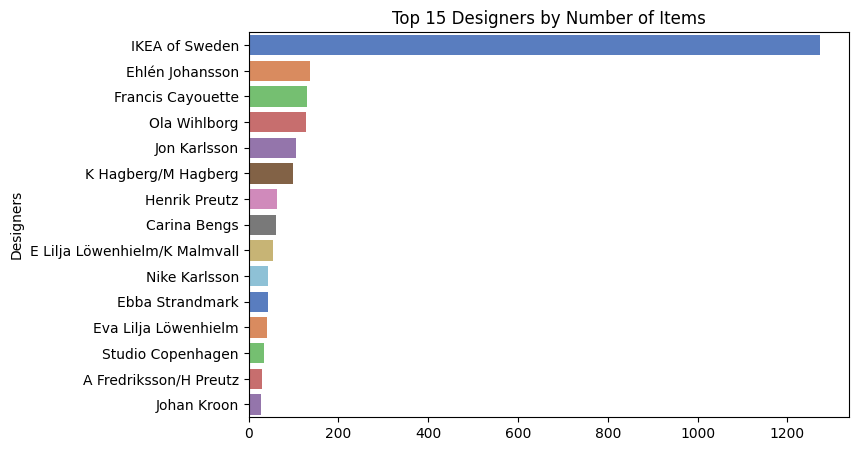

<ipython-input-1-7617921513ce>:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ikea_top_designers.groupby('designer')['price'].median().sort_values(ascending=False).values,


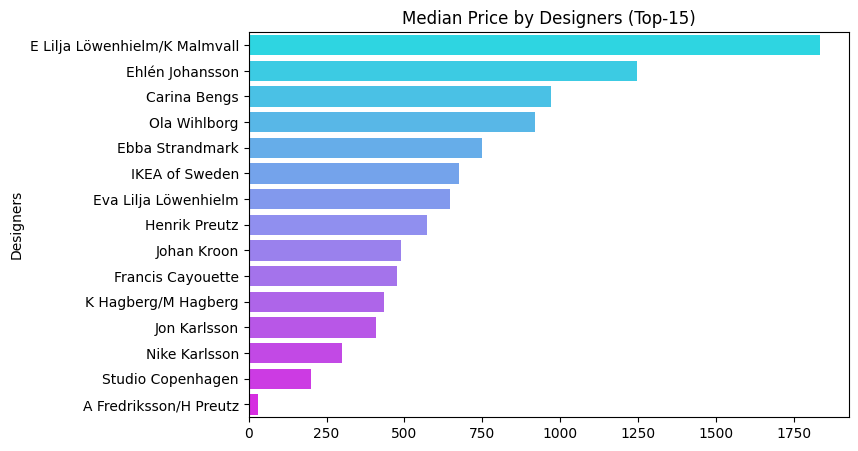


Category distribution
| category                         |   proportion |
|:---------------------------------|-------------:|
| Bookcases & shelving units       |    0.18501   |
| Chairs                           |    0.147873  |
| Sofas & armchairs                |    0.128292  |
| Tables & desks                   |    0.124916  |
| Wardrobes                        |    0.0742741 |
| Beds                             |    0.0702228 |
| Outdoor furniture                |    0.0665091 |
| Cabinets & cupboards             |    0.063133  |
| Chests of drawers & drawer units |    0.0374747 |
| TV & media furniture             |    0.0300473 |


<ipython-input-1-7617921513ce>:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=ikea_items, y='category', order=category_dist.index, palette="viridis", legend=False)


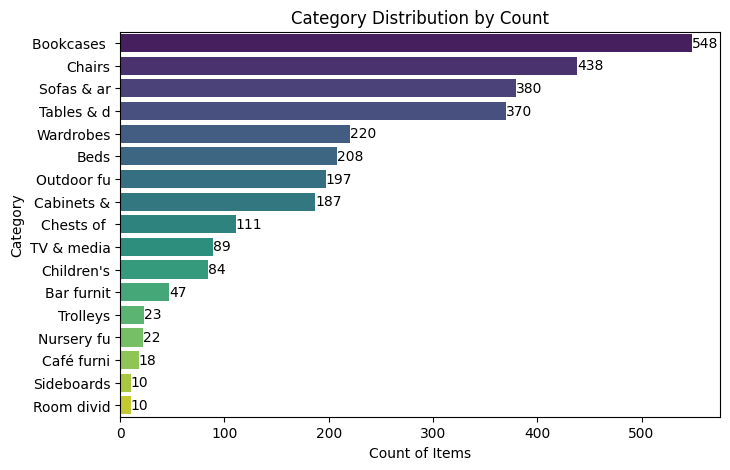

<ipython-input-1-7617921513ce>:277: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ikea_items.groupby('category')['price'].median().sort_values(ascending=False).values,


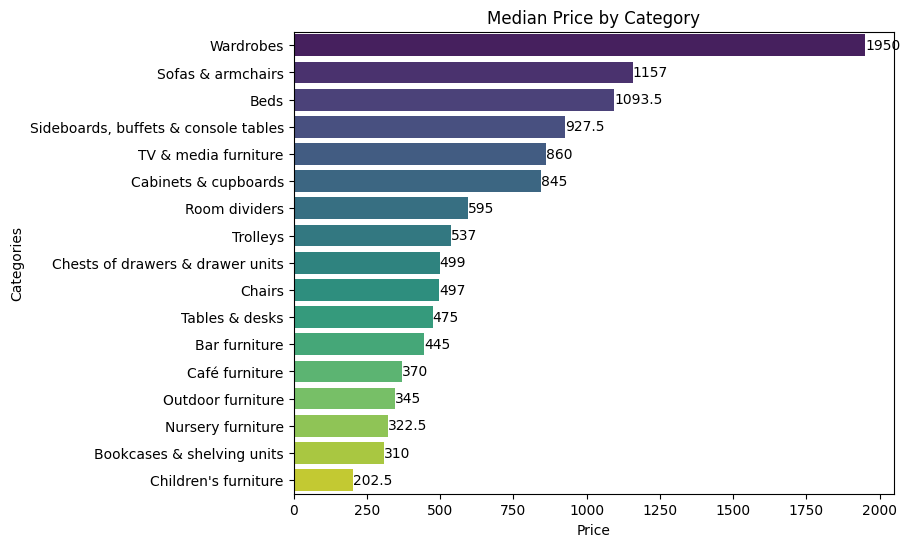

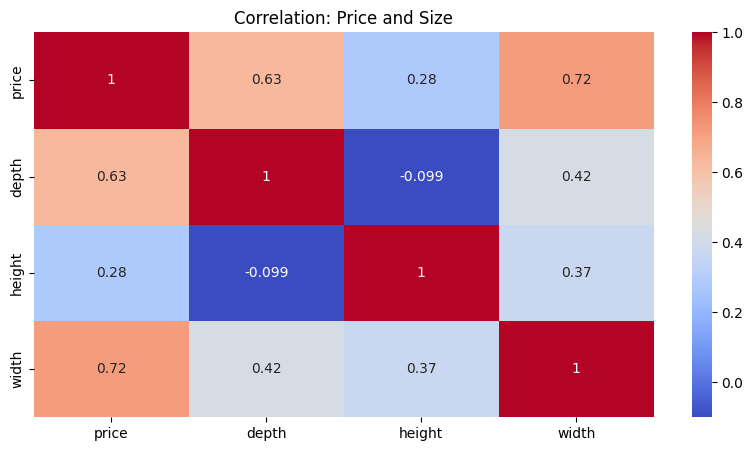

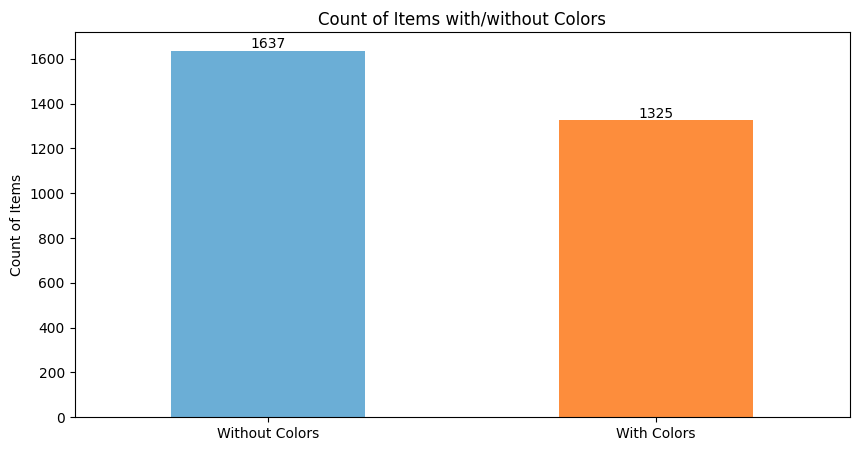

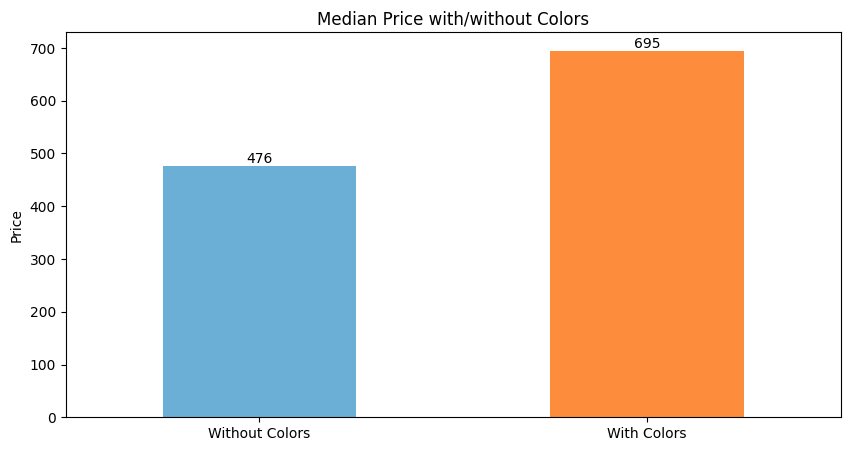

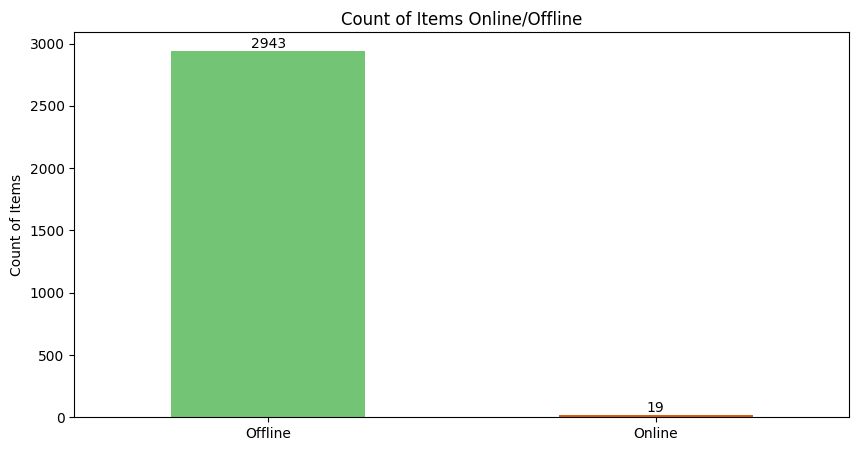

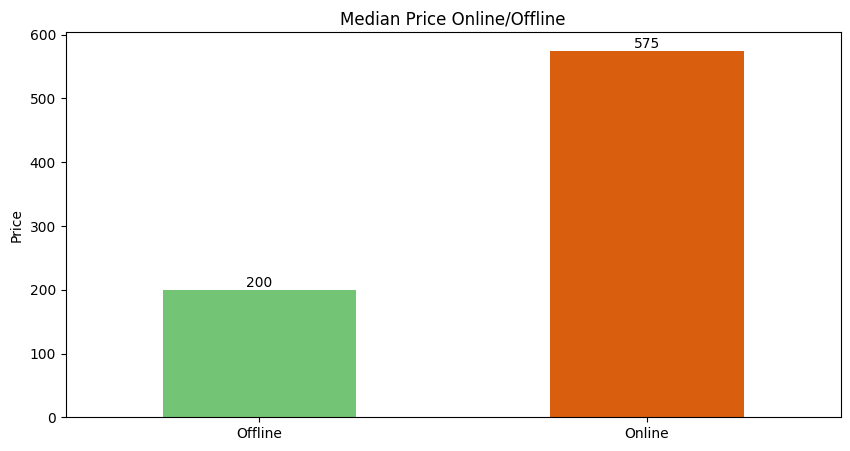

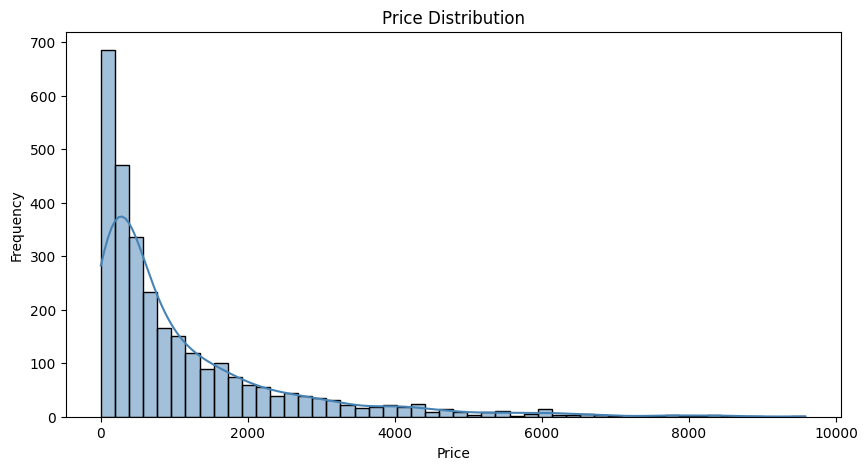

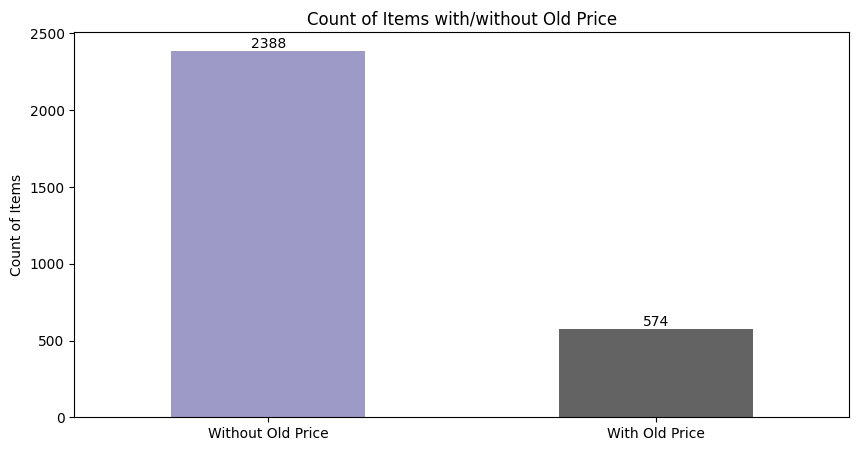

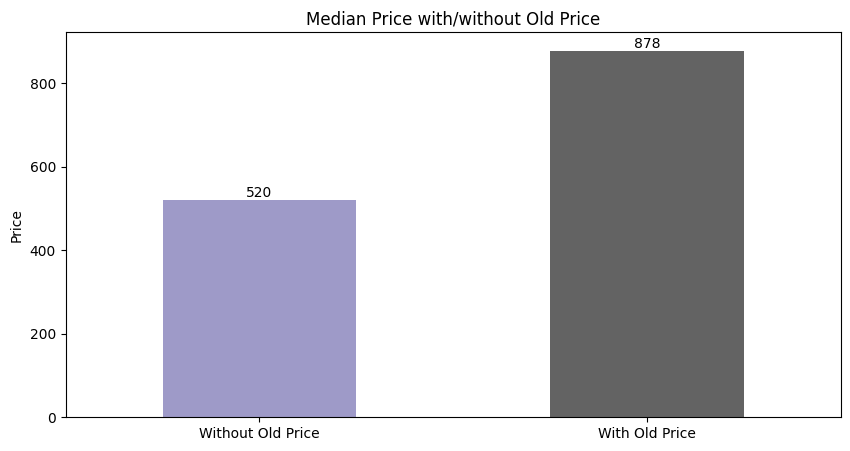

ГІПОТЕЗА 1


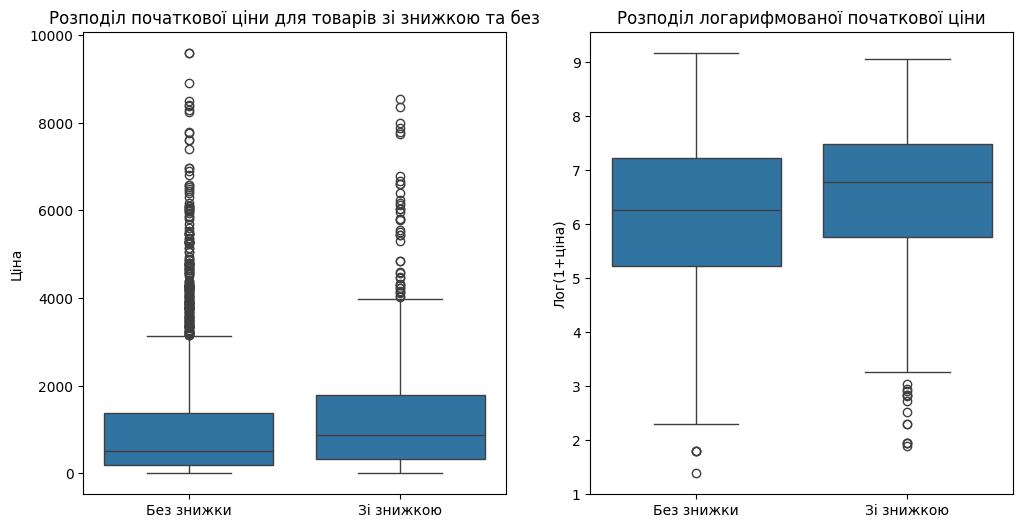

Статистика тесту Манна-Уітні (нелогарифмована ціна): 872284.0
P-value (нелогарифмована ціна): 1.480291128624832e-24
Медіанна початкова ціна для товарів зі знижкою: 1045.0
Медіанна ціна для товарів без знижки: 520.0

Статистика тесту Манна-Уітні (логарифмована ціна): 872284.0
P-value (логарифмована ціна): 1.480291128624832e-24
Медіанна логарифмована початкова ціна для товарів зі знижкою: 6.952728644624869
Медіанна логарифмована ціна для товарів без знижки: 6.255750041753367

Результати тесту показують, що початкова ціна товарів зі знижкою статистично вища, ніж у товарів без знижки, як у звичайному, так і в логарифмованому масштабі.
Гіпотеза підтверджується.
ГІПОТЕЗА 2
Медіанна ціна для малих категорій: 395.0
Медіанна ціна для великих категорій: 595.0
Тест Шапіро-Вілка (малі категорії): p-value = 0.0000
Тест Шапіро-Вілка (великі категорії): p-value = 0.0000

Критерій Манна-Уїтні: Статистика = 331332.50, p-value = 1.0000
Нульову гіпотезу не можна відхилити: ціни не відрізняються значуще.


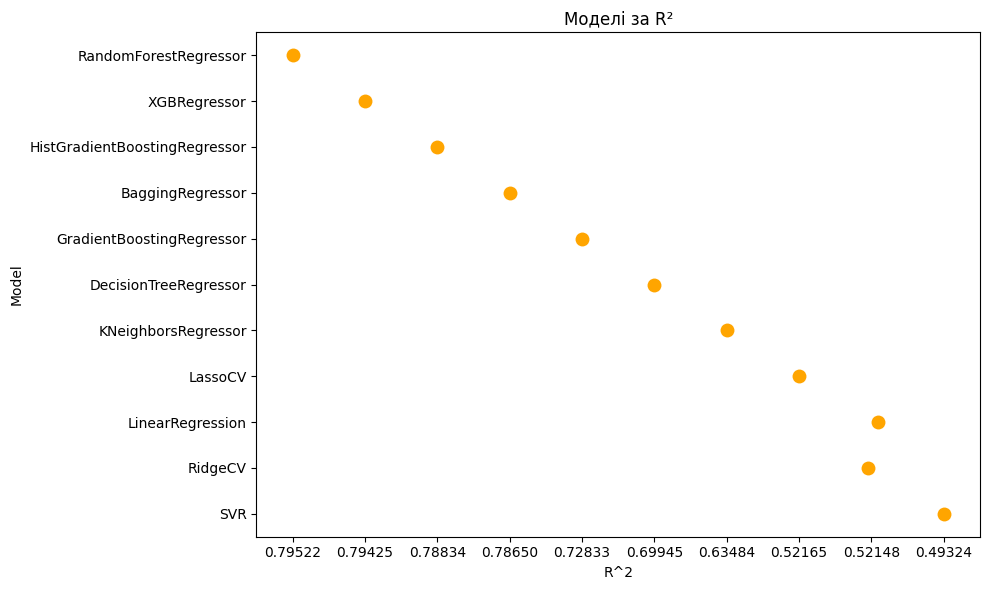

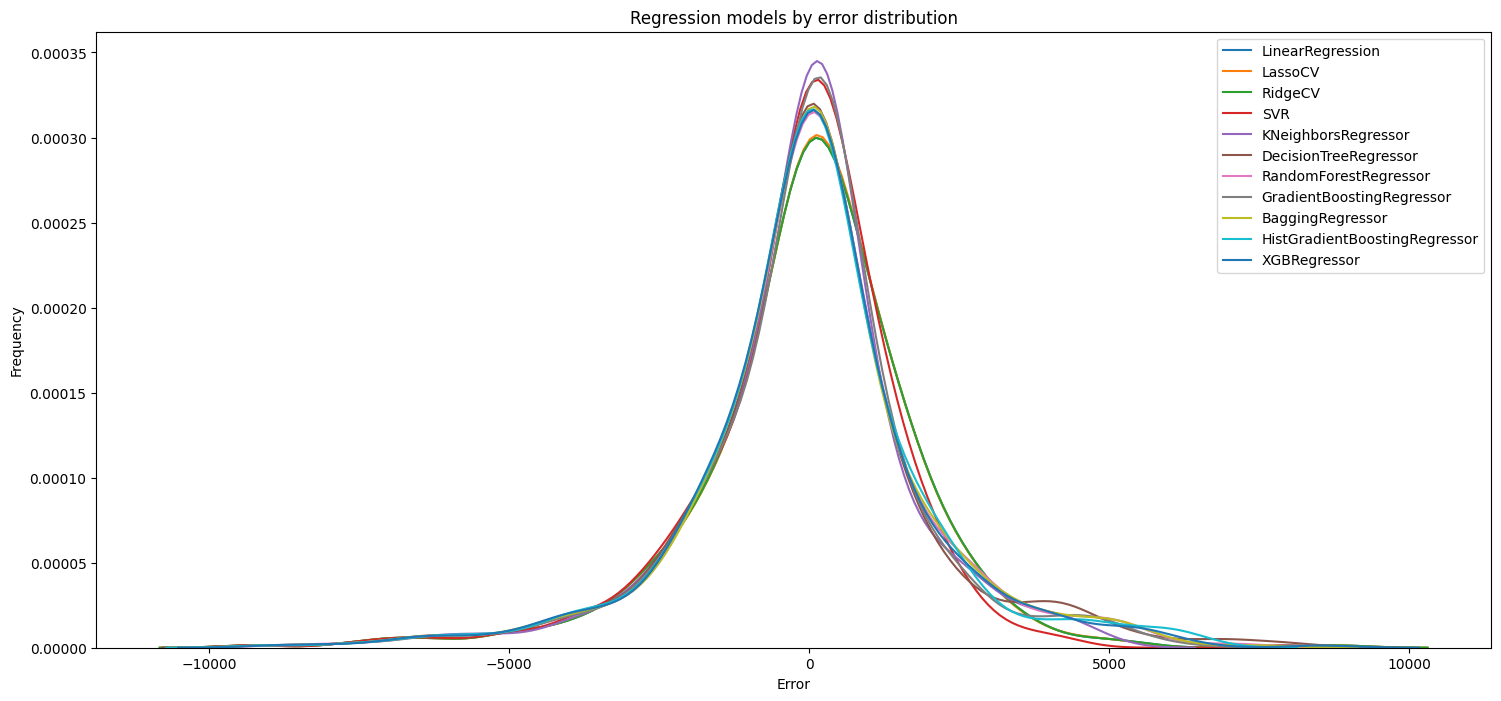

Best Estimator : RandomForestRegressor(max_depth=50)
Best Score     : 0.7871542427138529

R^2     : 0.79489
MAE     : 362.48891
MSE     : 451210.33297
RMSE    : 671.72192

Feature importance:
---------------------------
0.15357    depth_1               (15.36%)
0.56806    width_1               (56.81%)
0.10811    height_1              (10.81%)
0.02305    category_median_price  (2.31%)
0.14720    designer_median_price  (14.72%)


<ipython-input-1-7617921513ce>:682: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


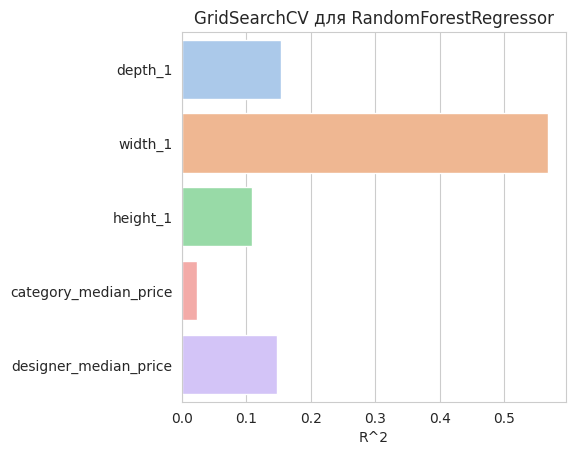

Показники ефективності моделі: [0.67298022 0.57610687 0.42053493 0.46102707 0.52263217]
Середній R² за крос-валідацією:  0.5306562527376598


In [1]:
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
from scipy.stats import mannwhitneyu, ttest_ind, shapiro
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, \
    HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb


# Функція перевірки статус коду та завантаження файлу
def download_file(file_name, file_url):
    if os.path.exists(file_name):
        print(f'{file_name} already exists')
    else:
        response = requests.get(file_url)
        if response.status_code == 200:
            with open(file_name, 'wb') as f:
                f.write(response.content)
            print(f'{file_name} was downloaded')
        else:
            print(f'Failed to download the document. Status code: {response.status_code}')

# Функція для перевірки наявності зайвого тексту в стовбці 'designer'
def remove_product_description(designer):
    if isinstance(designer, str):
        if any(char.isdigit() for char in designer.split()[0]) and '.' in designer.split()[0]:
            return np.nan
    return designer

# Функція для нормалізації порядку імен
def clean_and_normalize_designer(designer):
    if isinstance(designer, str):
        parts = designer.split("/")
        parts.sort()
        return "/".join(parts)
    return designer

# Функція перевірки позитивного значення
def is_positive_float(value):
    try:
        return float(value) > 0
    except ValueError:
        return False

# Функція порівнює кілька регресійних моделей і повертає їхні показники ефективності та прогнози
def get_best_regressor(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    models = [
        LinearRegression(),
        LassoCV(),
        RidgeCV(),
        SVR(kernel="linear"),
        KNeighborsRegressor(n_neighbors=16),
        DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor(random_state=42),
        BaggingRegressor(random_state=42),
        HistGradientBoostingRegressor(),
        xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    ]

    model_names = []
    predictions = []
    TestModels = pd.DataFrame()
    tmp = {}

    for model in models:
        m = str(model)
        model_name = m[:m.index('(')]
        model_names.append(model_name)
        model.fit(X_train, Y_train)
        Y_predict = model.predict(X_test)
        predictions.append(Y_predict)
        tmp['Model'] = model_name
        tmp['R^2'] = '{:.5f}'.format(r2_score(Y_test, Y_predict))
        tmp['MAE'] = '{:.5f}'.format(mean_absolute_error(Y_test, Y_predict))
        tmp['MSE'] = '{:.5f}'.format(mean_squared_error(Y_test, Y_predict))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(mean_squared_error(Y_test, Y_predict)))
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])

    TestModels.set_index('Model', inplace=True)
    res = TestModels
    print(X_train)
    print(Y_train)
    print(X_test)
    print(Y_test)

    return res, model_names, predictions

## Частина перша: очищення даних.

# Завантаження даних
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

file_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv"
file_name = 'ikea_items.csv'

# DataFrame structure:
# Column            Type      Description
# -------------------------------------------------
# item_id           int64     Unique number for item
# name              object    Name of item
# category          object    Category name
# price             float64   Price of item
# old_price         object    Has or not old price
# sellable_online   bool      Available in online market
# link              object    Link to item
# other_colors      object    Availability of different colors
# short_description object    Short info about item
# designer          object    Designer name
# depth             float64   Depth of item
# height            float64   Height of item
# width             float64   Width of item

download_file(file_name, file_url)
ikea_items = pd.read_csv(file_name, encoding='utf-8', index_col=0)

# Перевірка колонки price
invalid_prices = ikea_items[~ikea_items['price'].apply(is_positive_float)]

if not invalid_prices.empty:
    print("Invalid price values:")
    print(invalid_prices)
else:
    print("All prices are valid")

ikea_items = ikea_items[ikea_items['price'].apply(is_positive_float)]

# Перевірка значень у колонці 'other_colors' і перетворення на True/False
ikea_items['has_other_colors'] = ikea_items['other_colors'].map({'Yes': True, 'No': False})

# Обробляємо старі ціни, позначаючи їх наявність, очищаючи від символів і фільтруючи за умовами
ikea_items['has_old_price'] = ikea_items['old_price'].apply(lambda x: True if x != 'No old price' else False)
ikea_items['old_price'] = ikea_items['old_price'].replace("No old price", np.nan)
ikea_items['old_price'] = ikea_items['old_price'].str.replace("SR", "", regex=False)
ikea_items['old_price'] = ikea_items['old_price'].str.replace(",", "", regex=False)
ikea_items['old_price'] = ikea_items['old_price'].apply(lambda x: np.nan if "pack" in str(x) else x)
ikea_items['old_price'] = ikea_items['old_price'].astype(float)

## Заповнюємо пусті записи (NaN) медіанними значеннями
ikea_items['old_price'] = ikea_items['old_price'].fillna(ikea_items['old_price'].median())

print(ikea_items.head(1).to_markdown())

# Вивчення структури даних
print("Data shape:")
print(ikea_items.shape)
print("Columns:", ikea_items.columns)
print("Data types:")
print(ikea_items.dtypes.to_markdown())
print("Info:")
print(ikea_items.info())
print("Stats info:")
print(ikea_items.describe().to_markdown())
print("Total dublicated:")
print(ikea_items.duplicated().sum())
print("Unique values:")
print(ikea_items.nunique().to_markdown())

# Кількість товарів в кожній категорії, найбільші та найменші категорії
print("Amount of items by categories")
category_counts = ikea_items['category'].value_counts().sort_index()
print(category_counts.to_markdown())

print("Largest category:")
largest_category = ikea_items['category'].value_counts().sort_index().max()
print(largest_category)

print("Smallest category:")
smallest_category = ikea_items['category'].value_counts().sort_index().min()
print(smallest_category)

# Дублікати та їх видалення
print("First 10 dublicates:")
print(ikea_items[ikea_items.duplicated(subset=['item_id'])].head(10).to_markdown())
ikea_items = ikea_items.drop_duplicates(subset=['item_id'],ignore_index=True).copy()

# Кількість унікальних товарів
num_ikea_items = ikea_items["item_id"].nunique()
print("Total items:", num_ikea_items)

# Перші 10 дизайнерів
print("First 10 Designer")
designers = ikea_items["designer"].unique()
designers_df = pd.DataFrame({"Name": designers})
print(designers_df.head(10).to_markdown(index=False))

# Топ 10 найдорожчих товарів
print("Top 10 most expensive items:")
top_expensive_items = ikea_items.sort_values(by="price", ascending=False).head(10)
print(top_expensive_items.to_markdown())

ikea_items["designer"] = ikea_items["designer"].apply(remove_product_description)
ikea_items["designer"] = ikea_items["designer"].apply(clean_and_normalize_designer)

# Заміна значення в колонці 'designer', якщо воно містить 'IKEA of Sweden'
ikea_items['designer'] = ikea_items['designer'].apply(lambda x: 'IKEA of Sweden' if isinstance(x, str) and 'IKEA of Sweden' in x else x)
#print(ikea_items['designer'].unique())

# Збереження результату
ikea_items.to_csv("cleaned_ikea_items.csv", index=False)

unique_designers = ikea_items["designer"].dropna().unique()
print("First 10 unique designers")
designers_unique_df = pd.DataFrame({"Name": unique_designers})
print(designers_unique_df.head(30).to_markdown())

corr_matrix = ikea_items[['price', 'depth', 'height', 'width']].corr()

# Частина друга: описова статистика.

## Топ-15 дизайнерів за кількістю товарів
plt.figure(figsize=(10, 5))
top_15_designers = ikea_items['designer'].value_counts().head(15).index
ikea_top_designers = ikea_items[ikea_items['designer'].isin(top_15_designers)]
sns.barplot(x=ikea_top_designers['designer'].value_counts().values,
            y=ikea_top_designers['designer'].value_counts().index, palette="muted")
plt.title("Top 15 Designers by Number of Items")
plt.ylabel("Designers")
plt.subplots_adjust(left=0.3)
plt.show()

## Медіана ціни за дизайнерами (топ-15)
plt.figure(figsize=(10, 5))
sns.barplot(x=ikea_top_designers.groupby('designer')['price'].median().sort_values(ascending=False).values,
            y=ikea_top_designers.groupby('designer')['price'].median().sort_values(ascending=False).index,
            palette="cool")
plt.title("Median Price by Designers (Top-15)")
plt.ylabel("Designers")
plt.subplots_adjust(left=0.3)
plt.show()

## Вивід розподілу категорій
print("\nCategory distribution")
category_dist = ikea_items['category'].value_counts(normalize=True).sort_values(ascending=False)
print(category_dist.head(10).to_markdown())

### Побудова графіка
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=ikea_items, y='category', order=category_dist.index, palette="viridis", legend=False)

### Додавання підписів на стовпці
for container in ax.containers:
    ax.bar_label(container)

### Встановлення фіксованих позицій тікерів перед їхньою зміною
ax.yaxis.set_major_locator(ticker.FixedLocator(range(len(category_dist.index))))

### Змінюємо підписи категорій (обрізаємо до 10 символів)
ax.set_yticklabels([s[:10] for s in category_dist.index])

plt.subplots_adjust(left=0.3)
plt.xlabel("Count of Items")
plt.ylabel("Category")
plt.title("Category Distribution by Count")
plt.show()

## Медіана ціни за категоріями
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ikea_items.groupby('category')['price'].median().sort_values(ascending=False).values,
            y=ikea_items.groupby('category')['price'].median().sort_values(ascending=False).index,
            palette="viridis")

### Додавання значень на стовпці
for container in ax.containers:
    ax.bar_label(container)

plt.subplots_adjust(left=0.3)
plt.title("Median Price by Category")
plt.xlabel("Price")
plt.ylabel("Categories")
plt.show()

## Теплова карта кореляцій
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation: Price and Size")
plt.show()


## Кількість товарів з кольорами/без кольорів
plt.figure(figsize=(10, 5))
ax = ikea_items['has_other_colors'].value_counts().plot(kind='bar', color=["#6baed6", "#fd8d3c"])
plt.title("Count of Items with/without Colors")

### Додавання значень на стовпці
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(ticks=[0, 1], labels=['Without Colors', 'With Colors'], rotation=0)
plt.xlabel("")
plt.ylabel("Count of Items")
plt.show()

### Медіанна ціна з кольорами/без кольорів
plt.figure(figsize=(10, 5))
ax = ikea_items.groupby('has_other_colors')['price'].median().plot(kind='bar', color=["#6baed6", "#fd8d3c"])

### Додавання значень на стовпці
for container in ax.containers:
    ax.bar_label(container)

plt.title("Median Price with/without Colors")
plt.xticks(ticks=[0, 1], labels=["Without Colors", "With Colors"], rotation=0)
plt.xlabel("")
plt.ylabel("Price")
plt.show()

## Кількість товарів, доступних онлайн/офлайн
plt.figure(figsize=(10, 5))
ax = ikea_items['sellable_online'].value_counts().plot(kind='bar', color=["#74c476", "#d95f0e"])

### Додавання значень на стовпці
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of Items Online/Offline")
plt.xticks(ticks=[0, 1], labels=["Offline", "Online"], rotation=0)
plt.xlabel("")
plt.ylabel("Count of Items")
plt.show()

## Медіанна ціна онлайн/офлайн
plt.figure(figsize=(10, 5))
ax = ikea_items.groupby('sellable_online')['price'].median().plot(kind='bar', color=["#74c476", "#d95f0e"])

### Додавання значень на стовпці
for container in ax.containers:
    ax.bar_label(container)

plt.title("Median Price Online/Offline")
plt.xticks(ticks=[0, 1], labels=["Offline", "Online"], rotation=0)
plt.xlabel("")
plt.ylabel("Price")
plt.show()

## Розподіл цін
plt.figure(figsize=(10, 5))
sns.histplot(ikea_items['price'], bins=50, kde=True, color="steelblue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## Кількість товарів з/без старої ціни
plt.figure(figsize=(10, 5))
ax = ikea_items['has_old_price'].value_counts().plot(kind='bar', color=["#9e9ac8", "#636363"])

### Додавання значень на стовпці
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of Items with/without Old Price")
plt.xticks(ticks=[0, 1], labels=["Without Old Price", "With Old Price"], rotation=0)
plt.xlabel("")
plt.ylabel("Count of Items")
plt.show()

## Медіанна ціна з/без старої ціни
plt.figure(figsize=(10, 5))
ax = ikea_items.groupby('has_old_price')['price'].median().plot(kind='bar', color=["#9e9ac8", "#636363"])

### Додавання значень на стовпці
for container in ax.containers:
    ax.bar_label(container)

plt.title("Median Price with/without Old Price")
plt.xticks(ticks=[0, 1], labels=["Without Old Price", "With Old Price"], rotation=0)
plt.xlabel("")
plt.ylabel("Price")
plt.show()

# Частина третя: гіпотези

print("ГІПОТЕЗА 1")
# Гіпотеза: Уцінка залежить від ціни товару.
#
# Нульова гіпотеза (H0): Уцінка стосується дорогих та дешевих товарів однаково.
#
# Альтернативна гіпотеза (НА): Уцінка більше стосується дорогих товарів, тому товари з old_price мають вищу медіанну початкову ціну.
#
# Для перевірки цієї гіпотези використовується непараметричний тест Манна-Уітні, порівнюючи медіанні значення початкових цін товарів з вказаною старою ціною і без неї. Логарифмування цін дозволяє зменшити вплив великих значень, що може бути корисним при аналізі дорогих товарів.

# Порівняння медіанної початкової ціни для товарів зі знижкою та без
with_old_price = ikea_items.loc[ikea_items['has_old_price'], 'old_price']
without_old_price = ikea_items.loc[~ikea_items['has_old_price'], 'price']

# Логарифмування цін
with_old_price_log = np.log1p(with_old_price)
without_old_price_log = np.log1p(without_old_price)

# Використання непараметричного тесту Манна-Уітні
statistic, p_value = stats.mannwhitneyu(with_old_price, without_old_price, alternative='greater')
statistic_log, p_value_log = stats.mannwhitneyu(with_old_price_log, without_old_price_log, alternative='greater')

# Візуалізація розподілу цін
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=ikea_items, x='has_old_price', y='price')
plt.title('Розподіл початкової ціни для товарів зі знижкою та без')
plt.xticks([0, 1], ['Без знижки', 'Зі знижкою'])
plt.ylabel('Ціна')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.boxplot(x=ikea_items['has_old_price'], y=np.log1p(ikea_items['price']))
plt.title('Розподіл логарифмованої початкової ціни')
plt.xticks([0, 1], ['Без знижки', 'Зі знижкою'])
plt.ylabel('Лог(1+ціна)')
plt.xlabel('')
plt.show()

# Вивід результатів
print(f"Статистика тесту Манна-Уітні (нелогарифмована ціна): {statistic}")
print(f"P-value (нелогарифмована ціна): {p_value}")
print(f"Медіанна початкова ціна для товарів зі знижкою: {with_old_price.median()}")
print(f"Медіанна ціна для товарів без знижки: {without_old_price.median()}\n")

print(f"Статистика тесту Манна-Уітні (логарифмована ціна): {statistic_log}")
print(f"P-value (логарифмована ціна): {p_value_log}")
print(f"Медіанна логарифмована початкова ціна для товарів зі знижкою: {with_old_price_log.median()}")
print(f"Медіанна логарифмована ціна для товарів без знижки: {without_old_price_log.median()}\n")

# Висновок
if p_value < 0.05 and p_value_log < 0.05:
    print("Результати тесту показують, що початкова ціна товарів зі знижкою статистично вища, ніж у товарів без знижки, як у звичайному, так і в логарифмованому масштабі.")
    print("Гіпотеза підтверджується.")
else:
    print("Результати тесту не дозволяють відкинути нульову гіпотезу. Початкові ціни товарів зі знижкою та без не відрізняються значуще.")

print("ГІПОТЕЗА 2")

# Гіпотеза: Медіанна ціна категорії залежить від кількості товарів в категорії.
#
# Нульова гіпотеза (H0): Медіанна ціна категорії не залежить від кількості товарів у категорії.
#
# Альтернативна гіпотеза (НА): Категорії з малою кількістю товарів мають вищу медіанну ціну.
#
# Для перевірки цієї гіпотези використовується непараметричний тест Манна-Уітні, порівнюючи медіанні значення початкових цін товарів з вказаною старою ціною і без неї. Логарифмування цін дозволяє зменшити вплив великих значень, що може бути корисним при аналізі дорогих товарів.


# Обчислюємо кількість товарів у кожній категорії
category_counts = ikea_items['category'].value_counts()

# Визначаємо поріг для малих і великих категорій за кількістю товарів
median_count = category_counts.median()

# Розподіляємо категорії на малочисельні і великі
small_categories = category_counts[category_counts < median_count].index
large_categories = category_counts[category_counts >= median_count].index

# Об'єднуємо всі ціни для малих та великих категорій в окремі серії
small_cat_prices_all = ikea_items[ikea_items['category'].isin(small_categories)]['price'].dropna()
large_cat_prices_all = ikea_items[ikea_items['category'].isin(large_categories)]['price'].dropna()

# Обчислюємо медіани
small_cat_median = np.median(small_cat_prices_all)
large_cat_median = np.median(large_cat_prices_all)

print(f"Медіанна ціна для малих категорій: {small_cat_median}")
print(f"Медіанна ціна для великих категорій: {large_cat_median}")

# Перевірка нормальності розподілу цін
shapiro_small = shapiro(small_cat_prices_all)
shapiro_large = shapiro(large_cat_prices_all)

print(f"Тест Шапіро-Вілка (малі категорії): p-value = {shapiro_small.pvalue:.4f}")
print(f"Тест Шапіро-Вілка (великі категорії): p-value = {shapiro_large.pvalue:.4f}")

# Вибір статистичного тесту
if shapiro_small.pvalue > 0.05 and shapiro_large.pvalue > 0.05:
    # Використовуємо t-критерій Стьюдента, якщо обидві групи нормально розподілені
    t_statistic, p_value = ttest_ind(small_cat_prices_all, large_cat_prices_all, equal_var=False)
    test_name = "t-критерій Стьюдента"
else:
    # Використовуємо тест Манна-Уїтні, якщо хоча б одна група має ненормальний розподіл
    t_statistic, p_value = mannwhitneyu(small_cat_prices_all, large_cat_prices_all, alternative='greater')
    test_name = "Критерій Манна-Уїтні"

print(f"\n{test_name}: Статистика = {t_statistic:.2f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Нульову гіпотезу відхилено: ціни в малих та великих категоріях статистично відрізняються.")
else:
    print("Нульову гіпотезу не можна відхилити: ціни не відрізняються значуще.")

# Частина четверта: машинне навчання.

## Визначаємо список стовпців, які ми хочемо виключити з аналізу
exclude_cols = ['item_id', 'old_price', 'link', 'short_description', 'has_other_colors','has_old_price', 'sellable_online']

## Створюємо новий датафрейм без виключених стовпців
ikea_items_new = ikea_items.drop(exclude_cols, axis=1)

## Визначаємо вхідні ознаки (X) та цільову змінну (Y)
X = ikea_items_new[['depth', 'width', 'height', 'category', 'designer', 'other_colors']]
Y = ikea_items_new['price']

## Розбиваємо дані на навчальну та тестову вибірки (80% для тренування, 20% для тестування)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Описуємо перетворення для числових ознак
num_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

## Описуємо перетворення для категоріальних ознак
cat_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Описуємо трансформери для кожного типу ознак
col_prepr = ColumnTransformer(transformers=[
    ('numeric', num_transf, ['depth', 'width', 'height']),
    ('categorical', cat_transf, ['category', 'designer'])
])

## Створюємо pipeline для моделі: спочатку перетворення даних, потім побудова моделі
dtr = Pipeline(steps=[
    ('preprocessor', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

## Тренування моделі DecisionTreeRegressor на тренувальних даних
dtr.fit(X_train, Y_train)

## Прогнозування результатів на тестових даних
dtr_predict = dtr.predict(X_test)

## Виведення результатів
print('\nResults of Decision TreeRegressor')
print('Коефіцієнт детермінації (R^2): {:.5f}'.format(dtr.score(X_test, Y_test)))
print('Середня абсолютна похибка (MAE): {:.5f}'.format(mean_absolute_error(dtr_predict, Y_test)))
print('Середня квадратична похибка (MSE): {:.5f}'.format(mean_squared_error(dtr_predict, Y_test)))
print('Корінь середньої квадратичної похибки (RMSE): {:.5f}'.format(np.sqrt(mean_squared_error(dtr_predict, Y_test))))

# Отримуємо важливість ознак з моделі дерева рішень
feature_importances = dtr.named_steps['dtr'].feature_importances_

numeric_features = ['depth', 'height', 'width']
categorical_features = ['category', 'designer']

# Отримання назв колонок після препроцесингу
cat_columns = dtr.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_features)
final_columns = np.concatenate([numeric_features, cat_columns])

# Створення DataFrame для важливості факторів
importance_df = pd.DataFrame({
    'Feature': final_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Групування важливості по основним факторам
grouped_importances = {key: 0 for key in ['category', 'designer', 'depth', 'height', 'width']}
for _, row in importance_df.iterrows():
    for key in grouped_importances:
        if row['Feature'].startswith(key):
            grouped_importances[key] += row['Importance']
            break

grouped_importances_df = pd.DataFrame.from_dict(grouped_importances, orient='index', columns=['Importance'])
grouped_importances_df = grouped_importances_df.sort_values(by='Importance', ascending=False)
grouped_importances_df['Importance (%)'] = (grouped_importances_df['Importance'] / grouped_importances_df[
    'Importance'].sum()) * 100
print(grouped_importances_df)

## Видалення рядків з відсутніми значеннями для стовпця 'designer'
ikea_items_new = ikea_items_new.dropna(subset=['designer'])
print(ikea_items_new.isnull().sum())

## Обчислення медіан для різних категорій товарів
median_d = ikea_items_new.groupby(['category'])['depth'].median()
median_h = ikea_items_new.groupby(['category'])['height'].median()
median_w = ikea_items_new.groupby(['category'])['width'].median()

## Обчислення медіан для ціни за категоріями та дизайнерами
median_price = ikea_items_new.groupby(['category'])['price'].median()
median_dsgn = ikea_items_new.groupby(['designer'])['price'].median()

## Заповнення відсутніх значень для розмірів (depth, height, width) та ціни
ikea_items_new = ikea_items_new.set_index(['category'])
ikea_items_new['depth_1'] = ikea_items_new['depth'].fillna(median_d)
ikea_items_new['height_1'] = ikea_items_new['height'].fillna(median_h)
ikea_items_new['width_1'] = ikea_items_new['width'].fillna(median_w)
ikea_items_new['category_median_price'] = median_price

## Додавання медіан для ціни по дизайнерам
ikea_items_new = ikea_items_new.set_index(['designer'])
ikea_items_new['designer_median_price'] = median_dsgn

## Формування матриці ознак (X1) та цільової змінної (Y1)
X1 = ikea_items_new[['depth_1', 'width_1', 'height_1', 'category_median_price', 'designer_median_price']]
Y1 = ikea_items_new['price']

## Пошук найкращої моделі регресії для X1 та Y1
test1, model_names, predictions = get_best_regressor(X1, Y1)

## Сортування моделей за коефіцієнтом детермінації R²
model_info = test1.sort_values(by='R^2', ascending=False)
print(model_info)

## Побудова графіка моделей за R²
plt.figure(figsize=(10, 6))
sns.stripplot(data=model_info.reset_index(), x="R^2", y="Model", color="orange", size=10)
plt.title("Моделі за R²")
plt.tight_layout()
plt.show()

## Графік розподілу помилок
fig, ax = plt.subplots(figsize=(18, 8))
colors = sns.color_palette("tab10", len(model_names))

for i, (model_name, y_pred, color) in enumerate(zip(model_names, predictions, colors)):
    min_length = min(len(Y_test), len(y_pred))
    distribution = y_pred[:min_length] - Y_test.to_numpy()[:min_length]
    sns.kdeplot(distribution, label=model_name, color=color)

ax.set_xlabel('Error')
ax.set_ylabel('Frequency')
ax.set_title('Regression models by error distribution')
ax.legend()
plt.show()

## Виконання GridSearchCV для оптимізації гіперпараметрів RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

### Параметри для GridSearchCV
params = {'n_estimators': [10, 50, 100, 150],
          'max_depth': [10, 30, 50, 100],
         }
### Тренування моделі RandomForestRegressor за допомогою GridSearchCV
forest_grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5)
forest_grid.fit(X_train, Y_train)

### Виведення найкращих параметрів та результатів для RandomForestRegressor
print('Best Estimator :', forest_grid.best_estimator_)
print('Best Score     :', forest_grid.best_score_)
print('')

### Виведення метрик якості моделі для тестових даних
print('R^2     : {:.5f}'.format(r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE     : {:.5f}'.format(mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('MSE     : {:.5f}'.format(mean_squared_error(forest_grid.predict(X_test), Y_test)))
print('RMSE    : {:.5f}'.format(np.sqrt(mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('---------------------------')

### Виведення важливості ознак для найкращої моделі RandomForestRegressor
# Отримання важливостей
importances = forest_grid.best_estimator_.feature_importances_

# Перетворюємо у відсотки
importances_pct = importances * 100

# Вивід у форматі: "0.12345   feature_name   12.35%"
for feat, imp, imp_pct in zip(X_train.columns, importances, importances_pct):
    print('{:.5f}    {:<20}  ({:.2f}%)'.format(imp, feat, imp_pct))

## Побудова графіка важливості ознак для RandomForestRegressor
sns.set_style('whitegrid')
sns.barplot(
    x=forest_grid.best_estimator_.feature_importances_,
    y=X_train.columns,
    palette='pastel'
)
plt.subplots_adjust(left=0.3)
plt.title('GridSearchCV для RandomForestRegressor')
plt.ylabel("")
plt.xlabel("R^2")
plt.show()

## Оцінка моделі за допомогою крос-валідації
best_params = forest_grid.best_params_
scores = cross_val_score(RandomForestRegressor(**best_params), X1, Y1, cv=5)

### Виведення результатів крос-валідації
print('Показники ефективності моделі:', scores)
print('Середній R² за крос-валідацією: ', scores.mean())

